In [15]:
from base64 import b64encode

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from qutip import (coherent, destroy, expect, mesolve,
                   num, variance, HarmonicOscillatorWaveFunction)


In [16]:
N = 35
w = 1 * 2 * np.pi  # oscillator frequency
tlist = np.linspace(0, 10, 240)  # periods

In [17]:
# operators
a = destroy(N)
n = num(N)
x = (a + a.dag()) / np.sqrt(2)
p = -1j * (a - a.dag()) / np.sqrt(2)

In [18]:
# the quantum harmonic oscillator Hamiltonian
H = w * a.dag() * a

In [19]:
c_ops = []

# uncomment to see how things change when disspation is included
# c_ops = [np.sqrt(0.25) * a]

In [20]:
def plot_expect_with_variance(N, op_list, op_title, states):
    """
    Plot the expectation value of an operator (list of operators)
    with an envelope that describes the operators variance.
    """

    fig, axes = plt.subplots(1, len(op_list), figsize=(14, 3))

    for idx, op in enumerate(op_list):

        e_op = expect(op, states)
        v_op = variance(op, states)

        axes[idx].fill_between(
            tlist, e_op - np.sqrt(v_op), e_op + np.sqrt(v_op), color="green",
            alpha=0.5)
        axes[idx].plot(tlist, e_op, label="expectation")
        axes[idx].set_xlabel("Time")
        axes[idx].set_title(op_title[idx])

    return fig, axes

In [21]:
def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" \
                src="data:video/x-m4v;base64,{0}">'.format(
        video_encoded
    )
    return HTML(video_tag)

In [22]:
psi0 = coherent(N, 2.0)

In [23]:
result = mesolve(H, psi0, tlist, c_ops, [])

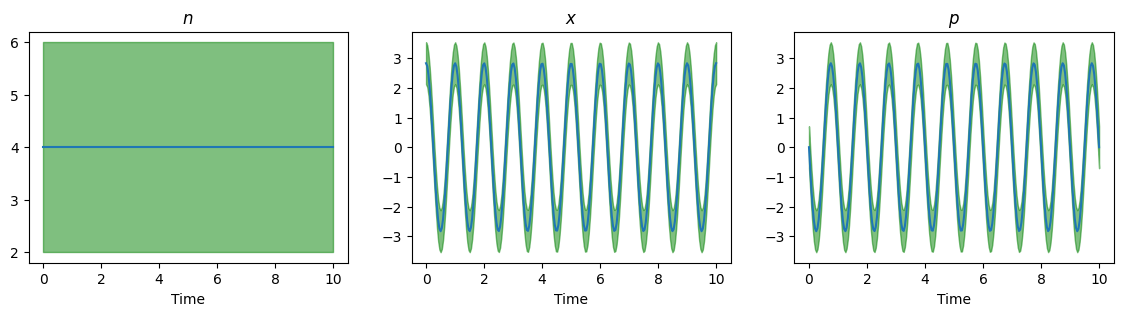

In [24]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"],
                          result.states);

In [26]:
fig = plt.figure()

def V(x):
    return 0.5 * x ** 2

xmin = -3
xmax = 3
xlst = np.linspace(xmin, xmax, 100)

for i in range(95, len(tlist)):
    ax = plt.axes(xlim = (xmin,xmax), ylim = (-2,2))
    fig.suptitle(f'$t = {round(tlist[i], 2)}$')
    
    ax.plot(xlst, V(xlst), label = r"$V(x)$")
    ax.legend(loc = "best")
    ax.axhline(y = 0, ls = "--", lw = 0.5, c = 'k')
    HarmonicOscillatorWaveFunction(psi = result.states[i], omega = w, extent = [xmin, xmax]).visualize(fig = fig, ax = ax)
    plt.savefig(f"{i:03d}.png", dpi = 600)

plt.close()

c:\Users\hendr\Documents\Python Scripts\#envQuantum\.venv\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


KeyboardInterrupt: 

In [ ]:
'''
fig = plt.figure()

def V(x):
    return 0.5 * x ** 2

xmin = -3
xmax = 3
xlst = np.linspace(xmin, xmax, 100)

tgen = (t for t in tlist)
def update(n):
    ax = plt.axes(xlim = (xmin,xmax), ylim = (-2,2))
    try:
        print(it:=round(next(tgen),2)) # Helps me track the progress of the video making
        fig.suptitle(f'$t = {it}$')
    except StopIteration:
        pass

    ax.plot(xlst, V(xlst), label = r"$V(x)$")
    ax.legend(loc = "best")
    ax.axhline(y = 0, ls = "--", lw = 0.5, c = 'k')
    HarmonicOscillatorWaveFunction(psi = result.states[n], omega = w, extent = [xmin, xmax]).visualize(fig = fig, ax = ax)
    return ax.artists

anim = animation.FuncAnimation(fig, update, frames=len(result.states),
                               blit=True)

anim.save("./animation-coherent-state.mp4", fps=24, writer="ffmpeg")

plt.close(fig)
'''

In [ ]:
display_embedded_video("./animation-coherent-state.mp4")